https://huggingface.co/sd-dreambooth-library

In [1]:
#@title Install and import requirements
%%capture
!pip install -qqq diffusers==0.11.1 transformers gradio ftfy accelerate

import diffusers
import gradio
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

from torch import autocast
from diffusers import StableDiffusionPipeline
import torch

model_id = "sd-dreambooth-library/cat-toy" 
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

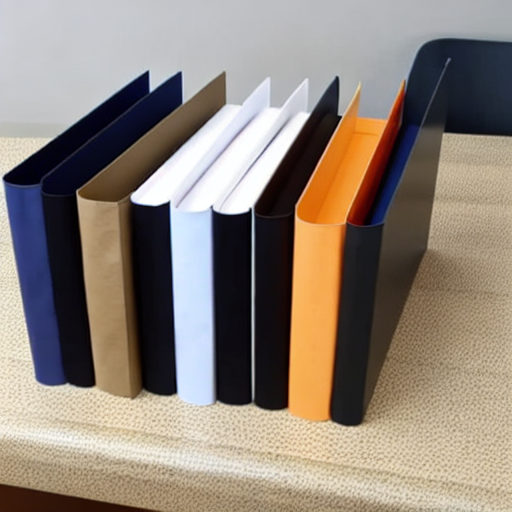

In [11]:
#@title Run the Stable Diffusion pipeline on Colab
#@markdown Don't forget to use the `sks` token in your prompt

from torch import autocast
prompt = "paper binders on table" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 1 #@param {type:"number"}

all_images = [] 
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid